This note studies the correlation between the radio-to-optical offset (angular separation $\rho$ and normalized separation $X$) and the morphological index (skewness, roundness, and normalness) at $B$-, $R$-, and $IR$-band.

A tail of "1", "2", and "3" represents the skewness, roundness, and normalness, respectively.

- $\rho$ vs $MI-B$ (B1, B2, B3), $MI-R$ (R1, R2, R3), and $MI-IR$ (IR1, IR2, IR3)

- $X$ vs $MI-B$ (B1, B2, B3), $MI-R$ (R1, R2, R3), and $MI-IR$ (IR1, IR2, IR3)

In [1]:
from astropy.table import Table, join
from astropy import units as u
import numpy as np

import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator
%matplotlib inline

# My progs
from CorrTest import NWSmooth, new_corr_test

In [2]:
# Radio-to-optical offset
r2o = Table.read("../data/multiwav-offset-in-Gaia-frame.fits")

# LQAC5-catalog
lqac5 = Table.read("../data/lqac5-gedr3.fits")

r2o_lqac = join(r2o, lqac5, keys="iers_name")

print("Find {:d} sources in the LQAC-5 catalog".format(len(r2o_lqac)))

WARNING

Find 511 sources in the LQAC-5 catalog


: MergeConflictWarning: Cannot merge meta key 'TCOMM58' types <class 'str'> and <class 'str'>, choosing TCOMM58='? Absolute magnitude in band g' [astropy.utils.metadata]


# 1. Overall distribution
## 1.1. B-filter (B-band)

In [3]:
# MI index at B-band
r2o_mib = Table(r2o_lqac)
r2o_mib.keep_columns(["ang_sep_sx_cor", "nor_sep_sx_cor", 
                      "ang_sep_k_cor", "nor_sep_k_cor",
                      "ang_sep_ka_cor", "nor_sep_ka_cor",
                      "I1B", "I2B", "I3B"])

# Check if the MI measurement is available
mask =  np.isnan(r2o_mib["I1B"]) == False
r2o_mib = r2o_mib[mask]

print("We found B-filter morphological index  for {:d} sources.".format(len(r2o_mib)))

We found B-filter morphological index  for 202 sources.


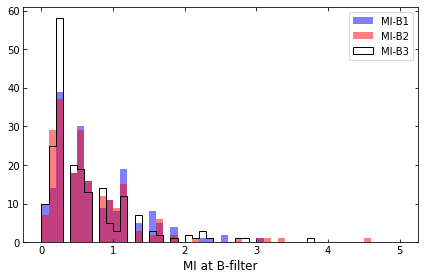

In [4]:
fig, ax = plt.subplots()

bins = np.arange(0, 5.1, 0.1)

ax.hist(r2o_mib["I1B"], bins=bins, histtype="stepfilled", color="b", alpha=0.5, label="MI-B1")
ax.hist(r2o_mib["I2B"], bins=bins, histtype="stepfilled", color="r", alpha=0.5, label="MI-B2")
ax.hist(r2o_mib["I3B"], bins=bins, histtype="step", color="k", label="MI-B3")
ax.set_xlabel("MI at B-filter", fontsize=12)

ax.legend()

plt.tight_layout()

In [5]:
keys = "I1B"
r2o_mib.sort(keys)

x1 = np.array(r2o_mib[keys])
y_sx1 = np.array(r2o_mib["ang_sep_sx_cor"])
y_k1 = np.array(r2o_mib["ang_sep_k_cor"])
y_xka1 = np.array(r2o_mib["ang_sep_ka_cor"])

nw_mean_sx1 = NWSmooth(x1, y_sx1)
nw_mean_k1 = NWSmooth(x1, y_k1)
nw_mean_xka1 = NWSmooth(x1, y_xka1)

In [6]:
keys = "I2B"
r2o_mib.sort(keys)

x2 = np.array(r2o_mib[keys])
y_sx2 = np.array(r2o_mib["ang_sep_sx_cor"])
y_k2 = np.array(r2o_mib["ang_sep_k_cor"])
y_xka2 = np.array(r2o_mib["ang_sep_ka_cor"])

nw_mean_sx2 = NWSmooth(x2, y_sx2)
nw_mean_k2 = NWSmooth(x2, y_k2)
nw_mean_xka2 = NWSmooth(x2, y_xka2)

In [7]:
keys = "I3B"
r2o_mib.sort(keys)

x3 = np.array(r2o_mib[keys])
y_sx3 = np.array(r2o_mib["ang_sep_sx_cor"])
y_k3 = np.array(r2o_mib["ang_sep_k_cor"])
y_xka3 = np.array(r2o_mib["ang_sep_ka_cor"])

nw_mean_sx3 = NWSmooth(x3, y_sx3)
nw_mean_k3 = NWSmooth(x3, y_k3)
nw_mean_xka3 = NWSmooth(x3, y_xka3)

Angular separation vs. MI-B


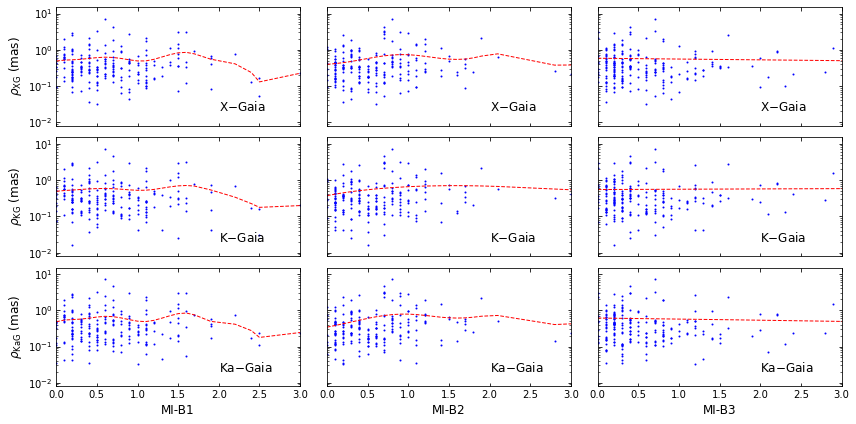

In [8]:
print("Angular separation vs. MI-B")

# Distribution of angular separation
fig, ((ax0, ax1, ax2),
      (ax3, ax4, ax5),
      (ax6, ax7, ax8)) = plt.subplots(figsize=(12, 6), nrows=3, ncols=3, sharex=True, sharey=True)

ax0.plot(r2o_mib["I1B"], r2o_mib["ang_sep_sx_cor"], "b.", ms=2)
ax1.plot(r2o_mib["I2B"], r2o_mib["ang_sep_sx_cor"], "b.", ms=2)
ax2.plot(r2o_mib["I3B"], r2o_mib["ang_sep_sx_cor"], "b.", ms=2)
ax3.plot(r2o_mib["I1B"], r2o_mib["ang_sep_k_cor"], "b.", ms=2)
ax4.plot(r2o_mib["I2B"], r2o_mib["ang_sep_k_cor"], "b.", ms=2)
ax5.plot(r2o_mib["I3B"], r2o_mib["ang_sep_k_cor"], "b.", ms=2)
ax6.plot(r2o_mib["I1B"], r2o_mib["ang_sep_ka_cor"], "b.", ms=2)
ax7.plot(r2o_mib["I2B"], r2o_mib["ang_sep_ka_cor"], "b.", ms=2)
ax8.plot(r2o_mib["I3B"], r2o_mib["ang_sep_ka_cor"], "b.", ms=2)

ax0.plot(x1, nw_mean_sx1, "r--", lw=1)
ax1.plot(x2, nw_mean_sx2, "r--", lw=1)
ax2.plot(x3, nw_mean_sx3, "r--", lw=1)
ax3.plot(x1, nw_mean_k1, "r--", lw=1)
ax4.plot(x2, nw_mean_k2, "r--", lw=1)
ax5.plot(x3, nw_mean_k3, "r--", lw=1)
ax6.plot(x1, nw_mean_xka1, "r--", lw=1)
ax7.plot(x2, nw_mean_xka2, "r--", lw=1)
ax8.plot(x3, nw_mean_xka3, "r--", lw=1)

ymin, ymax = 0.008, 15
ax0.set_ylim([ymin, ymax])

ax0.set_ylabel("$\\rho_\\mathrm{XG}$ (mas)", fontsize=12)
ax3.set_ylabel("$\\rho_\\mathrm{KG}$ (mas)", fontsize=12)
ax6.set_ylabel("$\\rho_\\mathrm{KaG}$ (mas)", fontsize=12)
ax6.set_xlabel("MI-B1", fontsize=12)
ax7.set_xlabel("MI-B2", fontsize=12)
ax8.set_xlabel("MI-B3", fontsize=12)

posx, posy = 2, 0.02
ax0.text(posx, posy, "X$-$Gaia", fontsize=12)
ax1.text(posx, posy, "X$-$Gaia", fontsize=12)
ax2.text(posx, posy, "X$-$Gaia", fontsize=12)
ax3.text(posx, posy, "K$-$Gaia", fontsize=12)
ax4.text(posx, posy, "K$-$Gaia", fontsize=12)
ax5.text(posx, posy, "K$-$Gaia", fontsize=12)
ax6.text(posx, posy, "Ka$-$Gaia", fontsize=12)
ax7.text(posx, posy, "Ka$-$Gaia", fontsize=12)
ax8.text(posx, posy, "Ka$-$Gaia", fontsize=12)

ax0.set_yscale("log")
ax0.set_xlim([0, 3])

plt.subplots_adjust()
plt.tight_layout()

In [9]:
new_corr_test(x1, [y_sx1, y_k1, y_xka1], [nw_mean_sx1, nw_mean_k1, nw_mean_xka1],
              obj_name="Rho vs. I1B",
              ylabel=["SX", "K", "XKa"])

new_corr_test(x2, [y_sx2, y_k2, y_xka2], [nw_mean_sx2, nw_mean_k2, nw_mean_xka2],
              obj_name="Rho vs. I2B",
              ylabel=["SX", "K", "XKa"])

new_corr_test(x3, [y_sx3, y_k3, y_xka3], [nw_mean_sx3, nw_mean_k3, nw_mean_xka3],
              obj_name="Rho vs. I3B",
              ylabel=["SX", "K", "XKa"])

Rho vs. I1B
            Pearson    p-val    Spearman    p-val    Kendall    p-val
-----------------------------------------------------------------
Original
-----------------------------------------------------------------
SX          -5.3e-03   9.4e-01  -3.3e-02   6.4e-01  -2.1e-02   6.6e-01
K           -2.9e-02   6.8e-01  -7.7e-02   2.8e-01  -5.4e-02   2.7e-01
XKa         -2.7e-02   7.0e-01  -3.7e-02   6.0e-01  -2.7e-02   5.8e-01
-----------------------------------------------------------------
Smoothed
SX          -5.2e-02   4.6e-01  +2.4e-01   4.9e-04  +2.7e-01   6.8e-08
K           -2.9e-01   2.9e-05  +3.1e-01   5.5e-06  +2.8e-01   2.7e-08
XKa         -2.2e-01   1.5e-03  +1.4e-01   4.7e-02  +1.9e-01   1.2e-04
-----------------------------------------------------------------
Rho vs. I2B
            Pearson    p-val    Spearman    p-val    Kendall    p-val
-----------------------------------------------------------------
Original
-----------------------------------------------------

In [10]:
keys = "I1B"
r2o_mib.sort(keys)

x1 = np.array(r2o_mib[keys])
y_sx1 = np.array(r2o_mib["nor_sep_sx_cor"])
y_k1 = np.array(r2o_mib["nor_sep_k_cor"])
y_xka1 = np.array(r2o_mib["nor_sep_ka_cor"])

nw_mean_sx1 = NWSmooth(x1, y_sx1)
nw_mean_k1 = NWSmooth(x1, y_k1)
nw_mean_xka1 = NWSmooth(x1, y_xka1)

In [11]:
keys = "I2B"
r2o_mib.sort(keys)

x2 = np.array(r2o_mib[keys])
y_sx2 = np.array(r2o_mib["nor_sep_sx_cor"])
y_k2 = np.array(r2o_mib["nor_sep_k_cor"])
y_xka2 = np.array(r2o_mib["nor_sep_ka_cor"])

nw_mean_sx2 = NWSmooth(x2, y_sx2)
nw_mean_k2 = NWSmooth(x2, y_k2)
nw_mean_xka2 = NWSmooth(x2, y_xka2)

In [12]:
keys = "I3B"
r2o_mib.sort(keys)

x3 = np.array(r2o_mib[keys])
y_sx3 = np.array(r2o_mib["nor_sep_sx_cor"])
y_k3 = np.array(r2o_mib["nor_sep_k_cor"])
y_xka3 = np.array(r2o_mib["nor_sep_ka_cor"])

nw_mean_sx3 = NWSmooth(x3, y_sx3)
nw_mean_k3 = NWSmooth(x3, y_k3)
nw_mean_xka3 = NWSmooth(x3, y_xka3)

Normalized separation vs. MI-B


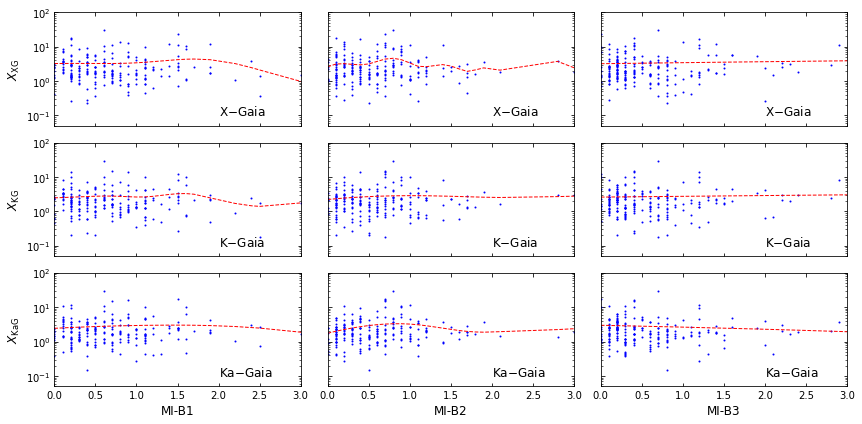

In [13]:
print("Normalized separation vs. MI-B")

# Distribution of angular separation
fig, ((ax0, ax1, ax2),
      (ax3, ax4, ax5),
      (ax6, ax7, ax8)) = plt.subplots(figsize=(12, 6), nrows=3, ncols=3, sharex=True, sharey=True)

ax0.plot(r2o_mib["I1B"], r2o_mib["nor_sep_sx_cor"], "b.", ms=2)
ax1.plot(r2o_mib["I2B"], r2o_mib["nor_sep_sx_cor"], "b.", ms=2)
ax2.plot(r2o_mib["I3B"], r2o_mib["nor_sep_sx_cor"], "b.", ms=2)
ax3.plot(r2o_mib["I1B"], r2o_mib["nor_sep_k_cor"], "b.", ms=2)
ax4.plot(r2o_mib["I2B"], r2o_mib["nor_sep_k_cor"], "b.", ms=2)
ax5.plot(r2o_mib["I3B"], r2o_mib["nor_sep_k_cor"], "b.", ms=2)
ax6.plot(r2o_mib["I1B"], r2o_mib["nor_sep_ka_cor"], "b.", ms=2)
ax7.plot(r2o_mib["I2B"], r2o_mib["nor_sep_ka_cor"], "b.", ms=2)
ax8.plot(r2o_mib["I3B"], r2o_mib["nor_sep_ka_cor"], "b.", ms=2)

ax0.plot(x1, nw_mean_sx1, "r--", lw=1)
ax1.plot(x2, nw_mean_sx2, "r--", lw=1)
ax2.plot(x3, nw_mean_sx3, "r--", lw=1)
ax3.plot(x1, nw_mean_k1, "r--", lw=1)
ax4.plot(x2, nw_mean_k2, "r--", lw=1)
ax5.plot(x3, nw_mean_k3, "r--", lw=1)
ax6.plot(x1, nw_mean_xka1, "r--", lw=1)
ax7.plot(x2, nw_mean_xka2, "r--", lw=1)
ax8.plot(x3, nw_mean_xka3, "r--", lw=1)

ymin, ymax = 0.05, 100
ax0.set_ylim([ymin, ymax])

ax0.set_ylabel("$X_\\mathrm{XG}$", fontsize=12)
ax3.set_ylabel("$X_\\mathrm{KG}$", fontsize=12)
ax6.set_ylabel("$X_\\mathrm{KaG}$", fontsize=12)
ax6.set_xlabel("MI-B1", fontsize=12)
ax7.set_xlabel("MI-B2", fontsize=12)
ax8.set_xlabel("MI-B3", fontsize=12)

posx, posy = 2, 0.1
ax0.text(posx, posy, "X$-$Gaia", fontsize=12)
ax1.text(posx, posy, "X$-$Gaia", fontsize=12)
ax2.text(posx, posy, "X$-$Gaia", fontsize=12)
ax3.text(posx, posy, "K$-$Gaia", fontsize=12)
ax4.text(posx, posy, "K$-$Gaia", fontsize=12)
ax5.text(posx, posy, "K$-$Gaia", fontsize=12)
ax6.text(posx, posy, "Ka$-$Gaia", fontsize=12)
ax7.text(posx, posy, "Ka$-$Gaia", fontsize=12)
ax8.text(posx, posy, "Ka$-$Gaia", fontsize=12)

ax0.set_yscale("log")
ax0.set_xlim([0, 3])

plt.subplots_adjust()
plt.tight_layout()

In [14]:
new_corr_test(x1, [y_sx1, y_k1, y_xka1], [nw_mean_sx1, nw_mean_k1, nw_mean_xka1],
              obj_name="X vs. I1B",
              ylabel=["SX", "K", "XKa"])

new_corr_test(x2, [y_sx2, y_k2, y_xka2], [nw_mean_sx2, nw_mean_k2, nw_mean_xka2],
              obj_name="X vs. I2B",
              ylabel=["SX", "K", "XKa"])

new_corr_test(x3, [y_sx3, y_k3, y_xka3], [nw_mean_sx3, nw_mean_k3, nw_mean_xka3],
              obj_name="X vs. I3B",
              ylabel=["SX", "K", "XKa"])

X vs. I1B
            Pearson    p-val    Spearman    p-val    Kendall    p-val
-----------------------------------------------------------------
Original
-----------------------------------------------------------------
SX          +5.1e-02   4.7e-01  -5.4e-02   4.4e-01  -3.9e-02   4.2e-01
K           -7.2e-03   9.2e-01  -5.4e-02   4.4e-01  -3.7e-02   4.5e-01
XKa         +1.1e-02   8.7e-01  +1.6e-02   8.2e-01  +1.3e-02   7.9e-01
-----------------------------------------------------------------
Smoothed
SX          +4.4e-01   8.9e-11  +4.9e-01   1.2e-13  +3.7e-01   1.2e-13
K           -6.6e-02   3.5e-01  +4.3e-01   1.6e-10  +3.9e-01   1.2e-14
XKa         +1.7e-01   1.8e-02  +8.6e-01   8.4e-60  +8.7e-01   1.1e-66
-----------------------------------------------------------------
X vs. I2B
            Pearson    p-val    Spearman    p-val    Kendall    p-val
-----------------------------------------------------------------
Original
---------------------------------------------------------

## 1.2. R-filter

In [15]:
# MI index at B-band
r2o_mir = Table(r2o_lqac)
r2o_mir.keep_columns(["ang_sep_sx_cor", "nor_sep_sx_cor",
                      "ang_sep_k_cor", "nor_sep_k_cor",
                      "ang_sep_ka_cor", "nor_sep_ka_cor",
                      "I1R", "I2R", "I3R"])

# Check if the MI measurement is available
mask =  np.isnan(r2o_mir["I1R"]) == False
r2o_mir = r2o_mir[mask]

print("We found R-filter morphological index for {:d} sources.".format(len(r2o_mir)))

We found R-filter morphological index for 416 sources.


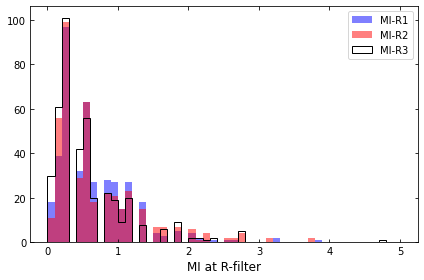

In [16]:
fig, ax = plt.subplots()

bins = np.arange(0, 5.1, 0.1)

ax.hist(r2o_mir["I1R"], bins=bins, histtype="stepfilled", color="b", alpha=0.5, label="MI-R1")
ax.hist(r2o_mir["I2R"], bins=bins, histtype="stepfilled", color="r", alpha=0.5, label="MI-R2")
ax.hist(r2o_mir["I3R"], bins=bins, histtype="step", color="k", label="MI-R3")
ax.set_xlabel("MI at R-filter", fontsize=12)

ax.legend()

plt.tight_layout()

In [17]:
keys = "I1R"
r2o_mir.sort(keys)

x1 = np.array(r2o_mir[keys])
y_sx1 = np.array(r2o_mir["ang_sep_sx_cor"])
y_k1 = np.array(r2o_mir["ang_sep_k_cor"])
y_xka1 = np.array(r2o_mir["ang_sep_ka_cor"])

nw_mean_sx1 = NWSmooth(x1, y_sx1)
nw_mean_k1 = NWSmooth(x1, y_k1)
nw_mean_xka1 = NWSmooth(x1, y_xka1)

keys = "I2R"
r2o_mir.sort(keys)

x2 = np.array(r2o_mir[keys])
y_sx2 = np.array(r2o_mir["ang_sep_sx_cor"])
y_k2 = np.array(r2o_mir["ang_sep_k_cor"])
y_xka2 = np.array(r2o_mir["ang_sep_ka_cor"])

nw_mean_sx2 = NWSmooth(x2, y_sx2)
nw_mean_k2 = NWSmooth(x2, y_k2)
nw_mean_xka2 = NWSmooth(x2, y_xka2)

keys = "I3R"
r2o_mir.sort(keys)

x3 = np.array(r2o_mir[keys])
y_sx3 = np.array(r2o_mir["ang_sep_sx_cor"])
y_k3 = np.array(r2o_mir["ang_sep_k_cor"])
y_xka3 = np.array(r2o_mir["ang_sep_ka_cor"])

nw_mean_sx3 = NWSmooth(x3, y_sx3)
nw_mean_k3 = NWSmooth(x3, y_k3)
nw_mean_xka3 = NWSmooth(x3, y_xka3)

Angular separation vs. MI-R


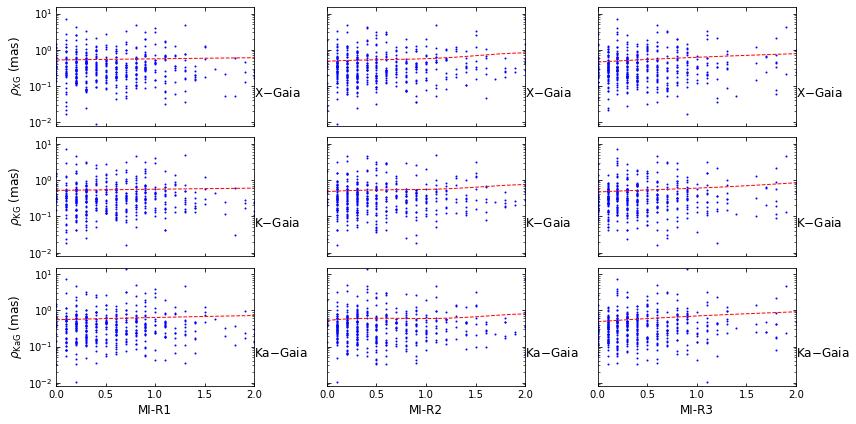

In [18]:
print("Angular separation vs. MI-R")

# Distribution of angular separation
fig, ((ax0, ax1, ax2),
      (ax3, ax4, ax5),
      (ax6, ax7, ax8)) = plt.subplots(figsize=(12, 6), nrows=3, ncols=3, sharex=True, sharey=True)

ax0.plot(r2o_mir["I1R"], r2o_mir["ang_sep_sx_cor"], "b.", ms=2)
ax1.plot(r2o_mir["I2R"], r2o_mir["ang_sep_sx_cor"], "b.", ms=2)
ax2.plot(r2o_mir["I3R"], r2o_mir["ang_sep_sx_cor"], "b.", ms=2)
ax3.plot(r2o_mir["I1R"], r2o_mir["ang_sep_k_cor"], "b.", ms=2)
ax4.plot(r2o_mir["I2R"], r2o_mir["ang_sep_k_cor"], "b.", ms=2)
ax5.plot(r2o_mir["I3R"], r2o_mir["ang_sep_k_cor"], "b.", ms=2)
ax6.plot(r2o_mir["I1R"], r2o_mir["ang_sep_ka_cor"], "b.", ms=2)
ax7.plot(r2o_mir["I2R"], r2o_mir["ang_sep_ka_cor"], "b.", ms=2)
ax8.plot(r2o_mir["I3R"], r2o_mir["ang_sep_ka_cor"], "b.", ms=2)

ax0.plot(x1, nw_mean_sx1, "r--", lw=1)
ax1.plot(x2, nw_mean_sx2, "r--", lw=1)
ax2.plot(x3, nw_mean_sx3, "r--", lw=1)
ax3.plot(x1, nw_mean_k1, "r--", lw=1)
ax4.plot(x2, nw_mean_k2, "r--", lw=1)
ax5.plot(x3, nw_mean_k3, "r--", lw=1)
ax6.plot(x1, nw_mean_xka1, "r--", lw=1)
ax7.plot(x2, nw_mean_xka2, "r--", lw=1)
ax8.plot(x3, nw_mean_xka3, "r--", lw=1)

ymin, ymax = 0.008, 15
ax0.set_ylim([ymin, ymax])

ax0.set_ylabel("$\\rho_\\mathrm{XG}$ (mas)", fontsize=12)
ax3.set_ylabel("$\\rho_\\mathrm{KG}$ (mas)", fontsize=12)
ax6.set_ylabel("$\\rho_\\mathrm{KaG}$ (mas)", fontsize=12)
ax6.set_xlabel("MI-R1", fontsize=12)
ax7.set_xlabel("MI-R2", fontsize=12)
ax8.set_xlabel("MI-R3", fontsize=12)

posx, posy = 2, 0.05
ax0.text(posx, posy, "X$-$Gaia", fontsize=12)
ax1.text(posx, posy, "X$-$Gaia", fontsize=12)
ax2.text(posx, posy, "X$-$Gaia", fontsize=12)
ax3.text(posx, posy, "K$-$Gaia", fontsize=12)
ax4.text(posx, posy, "K$-$Gaia", fontsize=12)
ax5.text(posx, posy, "K$-$Gaia", fontsize=12)
ax6.text(posx, posy, "Ka$-$Gaia", fontsize=12)
ax7.text(posx, posy, "Ka$-$Gaia", fontsize=12)
ax8.text(posx, posy, "Ka$-$Gaia", fontsize=12)

ax0.set_yscale("log")
ax0.set_xlim([0, 2])

plt.subplots_adjust()
plt.tight_layout()


In [19]:
new_corr_test(x1, [y_sx1, y_k1, y_xka1], [nw_mean_sx1, nw_mean_k1, nw_mean_xka1],
              obj_name="Rho vs. I1R",
              ylabel=["SX", "K", "XKa"])

new_corr_test(x2, [y_sx2, y_k2, y_xka2], [nw_mean_sx2, nw_mean_k2, nw_mean_xka2],
              obj_name="Rho vs. I2R",
              ylabel=["SX", "K", "XKa"])

new_corr_test(x3, [y_sx3, y_k3, y_xka3], [nw_mean_sx3, nw_mean_k3, nw_mean_xka3],
              obj_name="Rho vs. I3R",
              ylabel=["SX", "K", "XKa"])

Rho vs. I1R
            Pearson    p-val    Spearman    p-val    Kendall    p-val
-----------------------------------------------------------------
Original
-----------------------------------------------------------------
SX          +3.0e-02   5.4e-01  -1.9e-02   7.0e-01  -1.3e-02   7.1e-01
K           +2.9e-02   5.6e-01  +1.4e-02   7.7e-01  +1.1e-02   7.4e-01
XKa         +4.5e-02   3.6e-01  +3.3e-02   5.0e-01  +2.3e-02   5.1e-01
-----------------------------------------------------------------
Smoothed
SX          +1.0e+00   0.0e+00  +1.0e+00   0.0e+00  +1.0e+00  1.6e-178
K           +1.0e+00   0.0e+00  +1.0e+00   0.0e+00  +1.0e+00  1.6e-178
XKa         +1.0e+00   0.0e+00  +1.0e+00   0.0e+00  +1.0e+00  1.6e-178
-----------------------------------------------------------------
Rho vs. I2R
            Pearson    p-val    Spearman    p-val    Kendall    p-val
-----------------------------------------------------------------
Original
-----------------------------------------------------

In [20]:
keys = "I1R"
r2o_mir.sort(keys)

x1 = np.array(r2o_mir[keys])
y_sx1 = np.array(r2o_mir["nor_sep_sx_cor"])
y_k1 = np.array(r2o_mir["nor_sep_k_cor"])
y_xka1 = np.array(r2o_mir["nor_sep_ka_cor"])

nw_mean_sx1 = NWSmooth(x1, y_sx1)
nw_mean_k1 = NWSmooth(x1, y_k1)
nw_mean_xka1 = NWSmooth(x1, y_xka1)

keys = "I2R"
r2o_mir.sort(keys)

x2 = np.array(r2o_mir[keys])
y_sx2 = np.array(r2o_mir["nor_sep_sx_cor"])
y_k2 = np.array(r2o_mir["nor_sep_k_cor"])
y_xka2 = np.array(r2o_mir["nor_sep_ka_cor"])

nw_mean_sx2 = NWSmooth(x2, y_sx2)
nw_mean_k2 = NWSmooth(x2, y_k2)
nw_mean_xka2 = NWSmooth(x2, y_xka2)

keys = "I3R"
r2o_mir.sort(keys)

x3 = np.array(r2o_mir[keys])
y_sx3 = np.array(r2o_mir["nor_sep_sx_cor"])
y_k3 = np.array(r2o_mir["nor_sep_k_cor"])
y_xka3 = np.array(r2o_mir["nor_sep_ka_cor"])

nw_mean_sx3 = NWSmooth(x3, y_sx3)
nw_mean_k3 = NWSmooth(x3, y_k3)
nw_mean_xka3 = NWSmooth(x3, y_xka3)

Normalized separation vs. MI-R


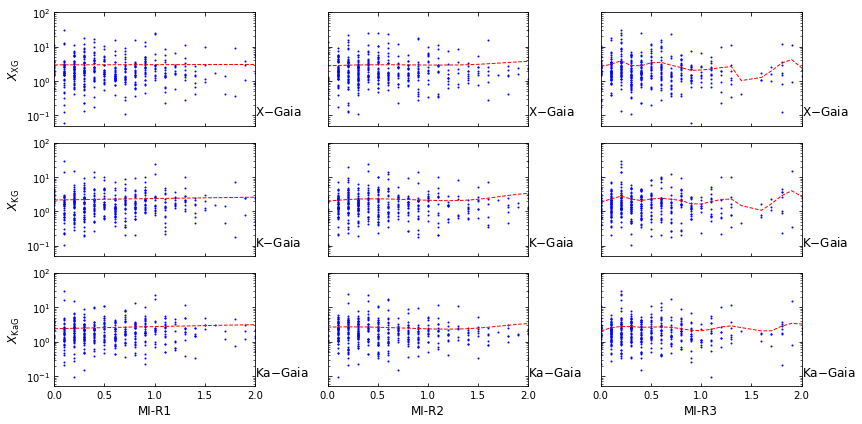

In [21]:
print("Normalized separation vs. MI-R")

# Distribution of angular separation
fig, ((ax0, ax1, ax2),
      (ax3, ax4, ax5),
      (ax6, ax7, ax8)) = plt.subplots(figsize=(12, 6), nrows=3, ncols=3, sharex=True, sharey=True)

ax0.plot(r2o_mir["I1R"], r2o_mir["nor_sep_sx_cor"], "b.", ms=2)
ax1.plot(r2o_mir["I2R"], r2o_mir["nor_sep_sx_cor"], "b.", ms=2)
ax2.plot(r2o_mir["I3R"], r2o_mir["nor_sep_sx_cor"], "b.", ms=2)
ax3.plot(r2o_mir["I1R"], r2o_mir["nor_sep_k_cor"], "b.", ms=2)
ax4.plot(r2o_mir["I2R"], r2o_mir["nor_sep_k_cor"], "b.", ms=2)
ax5.plot(r2o_mir["I3R"], r2o_mir["nor_sep_k_cor"], "b.", ms=2)
ax6.plot(r2o_mir["I1R"], r2o_mir["nor_sep_ka_cor"], "b.", ms=2)
ax7.plot(r2o_mir["I2R"], r2o_mir["nor_sep_ka_cor"], "b.", ms=2)
ax8.plot(r2o_mir["I3R"], r2o_mir["nor_sep_ka_cor"], "b.", ms=2)

ymin, ymax = 0.05, 100
ax0.set_ylim([ymin, ymax])

ax0.set_ylabel("$X_\\mathrm{XG}$", fontsize=12)
ax3.set_ylabel("$X_\\mathrm{KG}$", fontsize=12)
ax6.set_ylabel("$X_\\mathrm{KaG}$", fontsize=12)
ax6.set_xlabel("MI-R1", fontsize=12)
ax7.set_xlabel("MI-R2", fontsize=12)
ax8.set_xlabel("MI-R3", fontsize=12)

ax0.plot(x1, nw_mean_sx1, "r--", lw=1)
ax1.plot(x2, nw_mean_sx2, "r--", lw=1)
ax2.plot(x3, nw_mean_sx3, "r--", lw=1)
ax3.plot(x1, nw_mean_k1, "r--", lw=1)
ax4.plot(x2, nw_mean_k2, "r--", lw=1)
ax5.plot(x3, nw_mean_k3, "r--", lw=1)
ax6.plot(x1, nw_mean_xka1, "r--", lw=1)
ax7.plot(x2, nw_mean_xka2, "r--", lw=1)
ax8.plot(x3, nw_mean_xka3, "r--", lw=1)

posx, posy = 2, 0.1
ax0.text(posx, posy, "X$-$Gaia", fontsize=12)
ax1.text(posx, posy, "X$-$Gaia", fontsize=12)
ax2.text(posx, posy, "X$-$Gaia", fontsize=12)
ax3.text(posx, posy, "K$-$Gaia", fontsize=12)
ax4.text(posx, posy, "K$-$Gaia", fontsize=12)
ax5.text(posx, posy, "K$-$Gaia", fontsize=12)
ax6.text(posx, posy, "Ka$-$Gaia", fontsize=12)
ax7.text(posx, posy, "Ka$-$Gaia", fontsize=12)
ax8.text(posx, posy, "Ka$-$Gaia", fontsize=12)

ax0.set_yscale("log")
ax0.set_xlim([0, 2])

plt.subplots_adjust()
plt.tight_layout()

In [22]:
new_corr_test(x1, [y_sx1, y_k1, y_xka1], [nw_mean_sx1, nw_mean_k1, nw_mean_xka1],
              obj_name="X vs. I1R",
              ylabel=["SX", "K", "XKa"])

new_corr_test(x2, [y_sx2, y_k2, y_xka2], [nw_mean_sx2, nw_mean_k2, nw_mean_xka2],
              obj_name="X vs. I2R",
              ylabel=["SX", "K", "XKa"])

new_corr_test(x3, [y_sx3, y_k3, y_xka3], [nw_mean_sx3, nw_mean_k3, nw_mean_xka3],
              obj_name="X vs. I3R",
              ylabel=["SX", "K", "XKa"])

X vs. I1R
            Pearson    p-val    Spearman    p-val    Kendall    p-val
-----------------------------------------------------------------
Original
-----------------------------------------------------------------
SX          +6.3e-03   9.0e-01  -3.0e-02   5.4e-01  -2.1e-02   5.4e-01
K           +4.4e-02   3.8e-01  +1.4e-02   7.8e-01  +1.1e-02   7.5e-01
XKa         +6.8e-02   1.7e-01  +4.1e-02   4.0e-01  +2.9e-02   3.9e-01
-----------------------------------------------------------------
Smoothed
SX          +1.0e+00   0.0e+00  +1.0e+00   0.0e+00  +1.0e+00  1.6e-178
K           +1.0e+00   0.0e+00  +1.0e+00   0.0e+00  +1.0e+00  1.6e-178
XKa         +1.0e+00   0.0e+00  +1.0e+00   0.0e+00  +1.0e+00  1.6e-178
-----------------------------------------------------------------
X vs. I2R
            Pearson    p-val    Spearman    p-val    Kendall    p-val
-----------------------------------------------------------------
Original
---------------------------------------------------------

## 1.3. IR-filter

In [23]:
# MI index at IR-band
r2o_mii = Table(r2o_lqac)
r2o_mii.keep_columns(["ang_sep_sx_cor", "nor_sep_sx_cor",
                      "ang_sep_k_cor", "nor_sep_k_cor",
                      "ang_sep_ka_cor", "nor_sep_ka_cor",
                      "I1I", "I2I", "I3I"])

# Check if the MI measurement is available
mask =  np.isnan(r2o_mii["I1I"]) == False
r2o_mii = r2o_mii[mask]

print("We found R-filter morphological index for {:d} sources.".format(len(r2o_mii)))

We found R-filter morphological index for 361 sources.


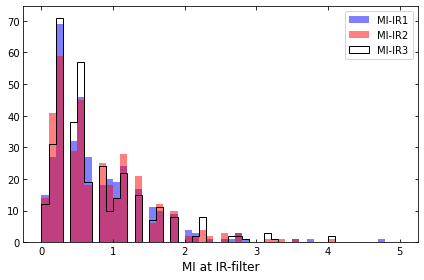

In [24]:
fig, ax = plt.subplots()

bins = np.arange(0, 5.1, 0.1)

ax.hist(r2o_mii["I1I"], bins=bins, histtype="stepfilled", color="b", alpha=0.5, label="MI-IR1")
ax.hist(r2o_mii["I2I"], bins=bins, histtype="stepfilled", color="r", alpha=0.5, label="MI-IR2")
ax.hist(r2o_mii["I3I"], bins=bins, histtype="step", color="k", label="MI-IR3")
ax.set_xlabel("MI at IR-filter", fontsize=12)

ax.legend()

plt.tight_layout()

In [25]:
keys = "I1I"
r2o_mii.sort(keys)

x1 = np.array(r2o_mii[keys])
y_sx1 = np.array(r2o_mii["ang_sep_sx_cor"])
y_k1 = np.array(r2o_mii["ang_sep_k_cor"])
y_xka1 = np.array(r2o_mii["ang_sep_ka_cor"])

nw_mean_sx1 = NWSmooth(x1, y_sx1)
nw_mean_k1 = NWSmooth(x1, y_k1)
nw_mean_xka1 = NWSmooth(x1, y_xka1)

keys = "I2I"
r2o_mii.sort(keys)

x2 = np.array(r2o_mii[keys])
y_sx2 = np.array(r2o_mii["ang_sep_sx_cor"])
y_k2 = np.array(r2o_mii["ang_sep_k_cor"])
y_xka2 = np.array(r2o_mii["ang_sep_ka_cor"])

nw_mean_sx2 = NWSmooth(x2, y_sx2)
nw_mean_k2 = NWSmooth(x2, y_k2)
nw_mean_xka2 = NWSmooth(x2, y_xka2)

keys = "I3I"
r2o_mii.sort(keys)

x3 = np.array(r2o_mii[keys])
y_sx3 = np.array(r2o_mii["ang_sep_sx_cor"])
y_k3 = np.array(r2o_mii["ang_sep_k_cor"])
y_xka3 = np.array(r2o_mii["ang_sep_ka_cor"])

nw_mean_sx3 = NWSmooth(x3, y_sx3)
nw_mean_k3 = NWSmooth(x3, y_k3)
nw_mean_xka3 = NWSmooth(x3, y_xka3)

Angular separation vs. MI-IR


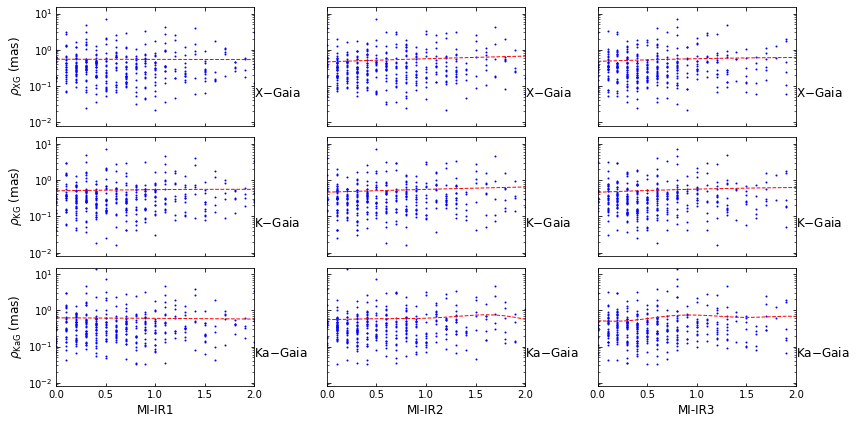

In [26]:
print("Angular separation vs. MI-IR")

# Distribution of angular separation
fig, ((ax0, ax1, ax2),
      (ax3, ax4, ax5),
      (ax6, ax7, ax8)) = plt.subplots(figsize=(12, 6), nrows=3, ncols=3, sharex=True, sharey=True)

ax0.plot(r2o_mii["I1I"], r2o_mii["ang_sep_sx_cor"], "b.", ms=2)
ax1.plot(r2o_mii["I2I"], r2o_mii["ang_sep_sx_cor"], "b.", ms=2)
ax2.plot(r2o_mii["I3I"], r2o_mii["ang_sep_sx_cor"], "b.", ms=2)
ax3.plot(r2o_mii["I1I"], r2o_mii["ang_sep_k_cor"], "b.", ms=2)
ax4.plot(r2o_mii["I2I"], r2o_mii["ang_sep_k_cor"], "b.", ms=2)
ax5.plot(r2o_mii["I3I"], r2o_mii["ang_sep_k_cor"], "b.", ms=2)
ax6.plot(r2o_mii["I1I"], r2o_mii["ang_sep_ka_cor"], "b.", ms=2)
ax7.plot(r2o_mii["I2I"], r2o_mii["ang_sep_ka_cor"], "b.", ms=2)
ax8.plot(r2o_mii["I3I"], r2o_mii["ang_sep_ka_cor"], "b.", ms=2)

ax0.plot(x1, nw_mean_sx1, "r--", lw=1)
ax1.plot(x2, nw_mean_sx2, "r--", lw=1)
ax2.plot(x3, nw_mean_sx3, "r--", lw=1)
ax3.plot(x1, nw_mean_k1, "r--", lw=1)
ax4.plot(x2, nw_mean_k2, "r--", lw=1)
ax5.plot(x3, nw_mean_k3, "r--", lw=1)
ax6.plot(x1, nw_mean_xka1, "r--", lw=1)
ax7.plot(x2, nw_mean_xka2, "r--", lw=1)
ax8.plot(x3, nw_mean_xka3, "r--", lw=1)

ymin, ymax = 0.008, 15
ax0.set_ylim([ymin, ymax])

ax0.set_ylabel("$\\rho_\\mathrm{XG}$ (mas)", fontsize=12)
ax3.set_ylabel("$\\rho_\\mathrm{KG}$ (mas)", fontsize=12)
ax6.set_ylabel("$\\rho_\\mathrm{KaG}$ (mas)", fontsize=12)
ax6.set_xlabel("MI-IR1", fontsize=12)
ax7.set_xlabel("MI-IR2", fontsize=12)
ax8.set_xlabel("MI-IR3", fontsize=12)

posx, posy = 2, 0.05
ax0.text(posx, posy, "X$-$Gaia", fontsize=12)
ax1.text(posx, posy, "X$-$Gaia", fontsize=12)
ax2.text(posx, posy, "X$-$Gaia", fontsize=12)
ax3.text(posx, posy, "K$-$Gaia", fontsize=12)
ax4.text(posx, posy, "K$-$Gaia", fontsize=12)
ax5.text(posx, posy, "K$-$Gaia", fontsize=12)
ax6.text(posx, posy, "Ka$-$Gaia", fontsize=12)
ax7.text(posx, posy, "Ka$-$Gaia", fontsize=12)
ax8.text(posx, posy, "Ka$-$Gaia", fontsize=12)

ax0.set_yscale("log")
ax0.set_xlim([0, 2])

plt.subplots_adjust()
plt.tight_layout()

In [27]:
new_corr_test(x1, [y_sx1, y_k1, y_xka1], [nw_mean_sx1, nw_mean_k1, nw_mean_xka1],
              obj_name="Rho vs. I1I",
              ylabel=["SX", "K", "XKa"])

new_corr_test(x2, [y_sx2, y_k2, y_xka2], [nw_mean_sx2, nw_mean_k2, nw_mean_xka2],
              obj_name="Rho vs. I2I",
              ylabel=["SX", "K", "XKa"])

new_corr_test(x3, [y_sx3, y_k3, y_xka3], [nw_mean_sx3, nw_mean_k3, nw_mean_xka3],
              obj_name="Rho vs. I3I",
              ylabel=["SX", "K", "XKa"])

Rho vs. I1I
            Pearson    p-val    Spearman    p-val    Kendall    p-val
-----------------------------------------------------------------
Original
-----------------------------------------------------------------
SX          -5.4e-03   9.2e-01  -3.5e-02   5.1e-01  -2.3e-02   5.2e-01
K           +9.5e-03   8.6e-01  +2.7e-02   6.1e-01  +1.9e-02   6.0e-01
XKa         -1.7e-02   7.5e-01  +2.4e-02   6.5e-01  +1.6e-02   6.7e-01
-----------------------------------------------------------------
Smoothed
SX          -1.0e+00   0.0e+00  -1.0e+00   0.0e+00  -1.0e+00  1.4e-158
K           +5.0e-01   1.9e-24  +9.4e-01  1.3e-167  +9.4e-01  4.3e-139
XKa         -9.7e-01  6.7e-224  -1.0e+00   0.0e+00  -1.0e+00  1.4e-158
-----------------------------------------------------------------
Rho vs. I2I
            Pearson    p-val    Spearman    p-val    Kendall    p-val
-----------------------------------------------------------------
Original
-----------------------------------------------------

In [28]:
keys = "I1I"
r2o_mii.sort(keys)

x1 = np.array(r2o_mii[keys])
y_sx1 = np.array(r2o_mii["nor_sep_sx_cor"])
y_k1 = np.array(r2o_mii["nor_sep_k_cor"])
y_xka1 = np.array(r2o_mii["nor_sep_ka_cor"])

nw_mean_sx1 = NWSmooth(x1, y_sx1)
nw_mean_k1 = NWSmooth(x1, y_k1)
nw_mean_xka1 = NWSmooth(x1, y_xka1)

keys = "I2I"
r2o_mii.sort(keys)

x2 = np.array(r2o_mii[keys])
y_sx2 = np.array(r2o_mii["nor_sep_sx_cor"])
y_k2 = np.array(r2o_mii["nor_sep_k_cor"])
y_xka2 = np.array(r2o_mii["nor_sep_ka_cor"])

nw_mean_sx2 = NWSmooth(x2, y_sx2)
nw_mean_k2 = NWSmooth(x2, y_k2)
nw_mean_xka2 = NWSmooth(x2, y_xka2)

keys = "I3I"
r2o_mii.sort(keys)

x3 = np.array(r2o_mii[keys])
y_sx3 = np.array(r2o_mii["nor_sep_sx_cor"])
y_k3 = np.array(r2o_mii["nor_sep_k_cor"])
y_xka3 = np.array(r2o_mii["nor_sep_ka_cor"])

nw_mean_sx3 = NWSmooth(x3, y_sx3)
nw_mean_k3 = NWSmooth(x3, y_k3)
nw_mean_xka3 = NWSmooth(x3, y_xka3)

Normalized separation vs. MI-IR


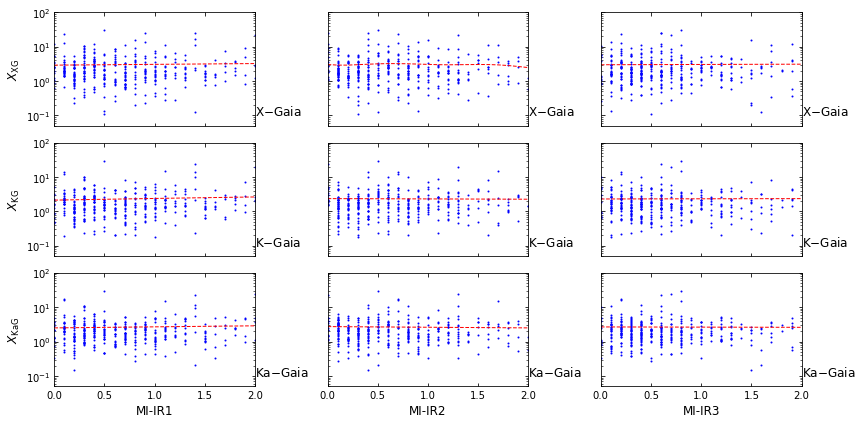

In [29]:
print("Normalized separation vs. MI-IR")

# Distribution of angular separation
fig, ((ax0, ax1, ax2),
      (ax3, ax4, ax5),
      (ax6, ax7, ax8)) = plt.subplots(figsize=(12, 6), nrows=3, ncols=3, sharex=True, sharey=True)

ax0.plot(r2o_mii["I1I"], r2o_mii["nor_sep_sx_cor"], "b.", ms=2)
ax1.plot(r2o_mii["I2I"], r2o_mii["nor_sep_sx_cor"], "b.", ms=2)
ax2.plot(r2o_mii["I3I"], r2o_mii["nor_sep_sx_cor"], "b.", ms=2)
ax3.plot(r2o_mii["I1I"], r2o_mii["nor_sep_k_cor"], "b.", ms=2)
ax4.plot(r2o_mii["I2I"], r2o_mii["nor_sep_k_cor"], "b.", ms=2)
ax5.plot(r2o_mii["I3I"], r2o_mii["nor_sep_k_cor"], "b.", ms=2)
ax6.plot(r2o_mii["I1I"], r2o_mii["nor_sep_ka_cor"], "b.", ms=2)
ax7.plot(r2o_mii["I2I"], r2o_mii["nor_sep_ka_cor"], "b.", ms=2)
ax8.plot(r2o_mii["I3I"], r2o_mii["nor_sep_ka_cor"], "b.", ms=2)

ax0.plot(x1, nw_mean_sx1, "r--", lw=1)
ax1.plot(x2, nw_mean_sx2, "r--", lw=1)
ax2.plot(x3, nw_mean_sx3, "r--", lw=1)
ax3.plot(x1, nw_mean_k1, "r--", lw=1)
ax4.plot(x2, nw_mean_k2, "r--", lw=1)
ax5.plot(x3, nw_mean_k3, "r--", lw=1)
ax6.plot(x1, nw_mean_xka1, "r--", lw=1)
ax7.plot(x2, nw_mean_xka2, "r--", lw=1)
ax8.plot(x3, nw_mean_xka3, "r--", lw=1)

ymin, ymax = 0.05, 100
ax0.set_ylim([ymin, ymax])

ax0.set_ylabel("$X_\\mathrm{XG}$", fontsize=12)
ax3.set_ylabel("$X_\\mathrm{KG}$", fontsize=12)
ax6.set_ylabel("$X_\\mathrm{KaG}$", fontsize=12)
ax6.set_xlabel("MI-IR1", fontsize=12)
ax7.set_xlabel("MI-IR2", fontsize=12)
ax8.set_xlabel("MI-IR3", fontsize=12)

posx, posy = 2, 0.1
ax0.text(posx, posy, "X$-$Gaia", fontsize=12)
ax1.text(posx, posy, "X$-$Gaia", fontsize=12)
ax2.text(posx, posy, "X$-$Gaia", fontsize=12)
ax3.text(posx, posy, "K$-$Gaia", fontsize=12)
ax4.text(posx, posy, "K$-$Gaia", fontsize=12)
ax5.text(posx, posy, "K$-$Gaia", fontsize=12)
ax6.text(posx, posy, "Ka$-$Gaia", fontsize=12)
ax7.text(posx, posy, "Ka$-$Gaia", fontsize=12)
ax8.text(posx, posy, "Ka$-$Gaia", fontsize=12)

ax0.set_yscale("log")
ax0.set_xlim([0, 2])

plt.subplots_adjust()
plt.tight_layout()

In [30]:
new_corr_test(x1, [y_sx1, y_k1, y_xka1], [nw_mean_sx1, nw_mean_k1, nw_mean_xka1],
              obj_name="X vs. I1I",
              ylabel=["SX", "K", "XKa"])

new_corr_test(x2, [y_sx2, y_k2, y_xka2], [nw_mean_sx2, nw_mean_k2, nw_mean_xka2],
              obj_name="X vs. I2I",
              ylabel=["SX", "K", "XKa"])

new_corr_test(x3, [y_sx3, y_k3, y_xka3], [nw_mean_sx3, nw_mean_k3, nw_mean_xka3],
              obj_name="X vs. I3I",
              ylabel=["SX", "K", "XKa"])

X vs. I1I
            Pearson    p-val    Spearman    p-val    Kendall    p-val
-----------------------------------------------------------------
Original
-----------------------------------------------------------------
SX          +2.9e-02   5.9e-01  -2.3e-02   6.6e-01  -1.3e-02   7.1e-01
K           +5.7e-02   2.8e-01  +5.4e-02   3.0e-01  +3.6e-02   3.2e-01
XKa         +4.0e-02   4.5e-01  +1.9e-02   7.2e-01  +1.3e-02   7.1e-01
-----------------------------------------------------------------
Smoothed
SX          +1.0e+00   0.0e+00  +1.0e+00   0.0e+00  +1.0e+00  1.4e-158
K           +1.0e+00   0.0e+00  +1.0e+00   0.0e+00  +1.0e+00  1.4e-158
XKa         +1.0e+00   0.0e+00  +1.0e+00   0.0e+00  +1.0e+00  1.4e-158
-----------------------------------------------------------------
X vs. I2I
            Pearson    p-val    Spearman    p-val    Kendall    p-val
-----------------------------------------------------------------
Original
---------------------------------------------------------